# Fundamentals of Data Science Course Project
##  Fashion MNIST

An MNIST-like dataset of 70,000 28x28 labeled fashion images
<br /><br />

___

### Content
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix.
For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.

### TL;DR

- Each row is a separate image
- Column 1 is the class label.
- Remaining columns are pixel numbers (784 total).
- Each value is the darkness of the pixel (1 to 255)



### Tasks:

1. Do the summary of the data and discuss it.
2. Reduce data dimensionality
3. Visualize the reduced dataset
4. Cluster the dataset (and evaluate clustering results with classification labels).
5. Split the dataset into training and testing.
6. Perform classification and evaluate its result.

In [1]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [2]:
dataset_train = pd.read_csv('./data/fashion-mnist_train.csv')
dataset_test = pd.read_csv('./data/fashion-mnist_test.csv')
dataset_train.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Labels

### Each training and test example is assigned to one of the following labels:

| Label | Category    |
|-------|-------------|
| 0     | T-shirt/top |
| 1     | Trouser     |
| 2     | Pullover    |
| 3     | Dress       |
| 4     | Coat        |
| 5     | Sandal      |
| 6     | Shirt       |
| 7     | Sneaker     |
| 8     | Bag         |
| 9     | Ankle boot  |


In [4]:
class_labels_mapping = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}
dataset_train['label_name'] = dataset_train['label'].map(class_labels_mapping)

In [56]:
# Display summary information about the dataset
print("\nSummary information about the training dataset:")
print(dataset_train.info())

# Display statistical summary of the dataset
print("\nStatistical summary of the training dataset:")
print(dataset_train.describe())


Summary information about the training dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 786 entries, label to label_name
dtypes: int64(785), object(1)
memory usage: 359.8+ MB
None

Statistical summary of the training dataset:
              label        pixel1        pixel2        pixel3        pixel4  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       4.500000      0.000900      0.006150      0.035333      0.101933   
std        2.872305      0.094689      0.271011      1.222324      2.452871   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000      0.000000      0.000000      0.000000      0.000000   
50%        4.500000      0.000000      0.000000      0.000000      0.000000   
75%        7.000000      0.000000      0.000000      0.000000      0.000000   
max        9.000000     16.000000     36.000000    226.000000    164.000000   

             pix

In [57]:
class_counts = dataset_train['label'].value_counts()
print("\nNumber of occurrences of each class in the training dataset:")
print(class_counts)


Number of occurrences of each class in the training dataset:
label
2    6000
9    6000
6    6000
0    6000
3    6000
4    6000
5    6000
8    6000
7    6000
1    6000
Name: count, dtype: int64


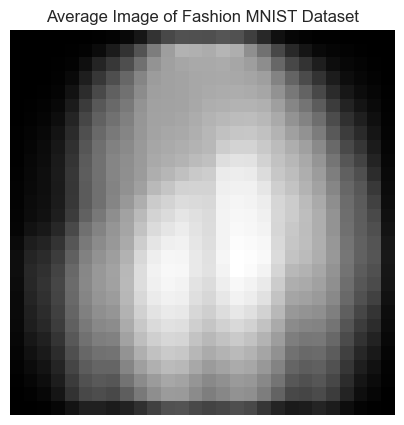

In [60]:
average_image = np.mean(dataset_train.drop(['label', 'label_name'], axis=1).values.reshape(-1, 28, 28), axis=0)

# Display the average image
plt.figure(figsize=(5, 5))
plt.imshow(average_image, cmap='gray')
plt.title("Average Image of Fashion MNIST Dataset")
plt.axis('off')
plt.show()

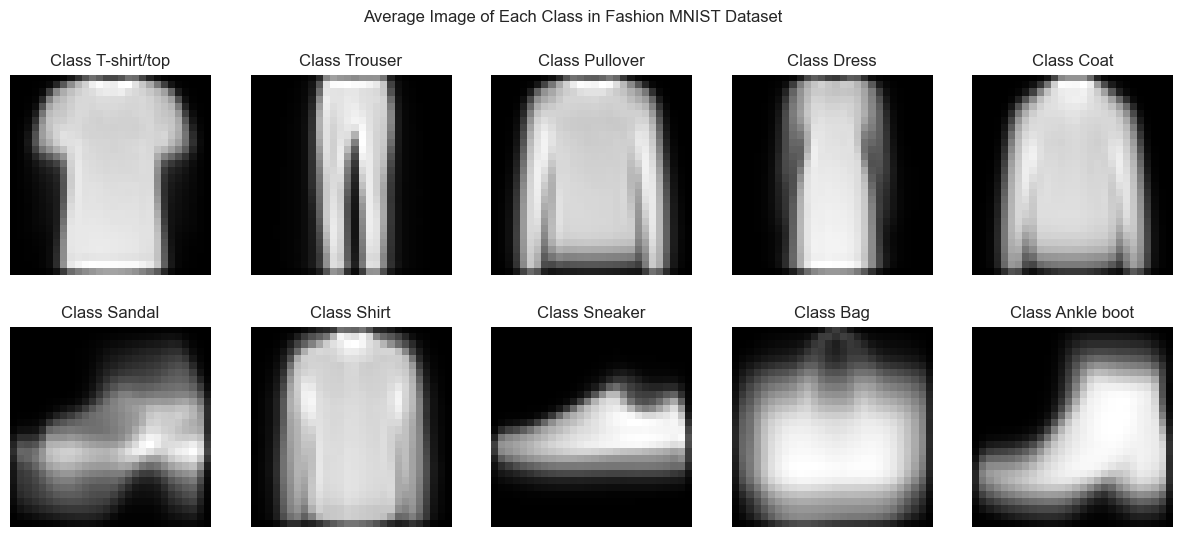

In [61]:
class_avg_images = {}

for class_label in range(10):  # Assuming there are 10 classes in Fashion MNIST
    class_images = dataset_train[dataset_train['label'] == class_label].drop(['label', 'label_name'], axis=1).values
    average_image = np.mean(class_images, axis=0).reshape(28, 28)
    class_avg_images[class_label] = average_image

# Display the average image for each class
plt.figure(figsize=(15, 6))
for class_label, average_image in class_avg_images.items():
    plt.subplot(2, 5, class_label + 1)
    plt.imshow(average_image, cmap='gray')
    plt.title(f"Class { class_labels_mapping[ class_label ] }")
    plt.axis('off')

plt.suptitle("Average Image of Each Class in Fashion MNIST Dataset")
plt.show()

## Visualization the distribution of classes in the training dataset

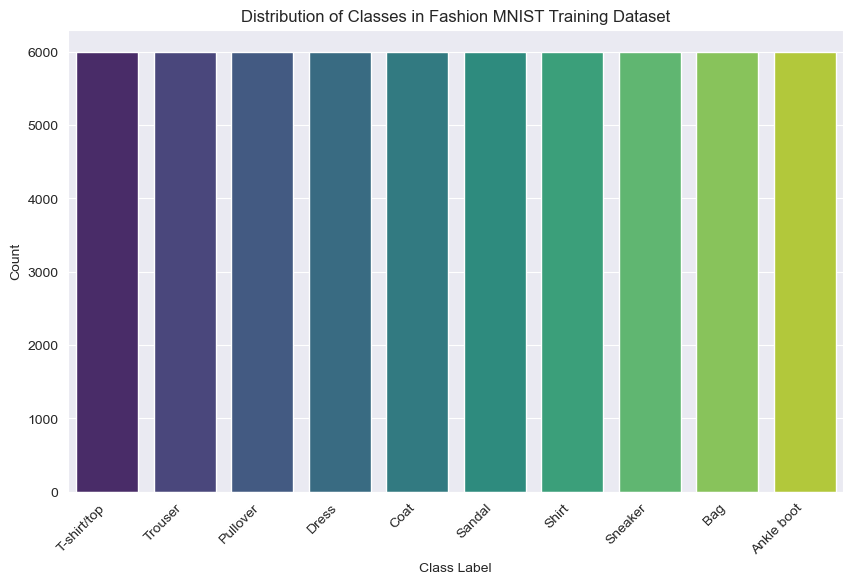

In [62]:
# Set up the plot
plt.figure(figsize=(10, 6))
seaborn.countplot(x='label_name', data=dataset_train, palette='viridis')
plt.title("Distribution of Classes in Fashion MNIST Training Dataset")
plt.xlabel("Class Label")
plt.ylabel("Count")

# Set x-axis labels explicitly
class_names = [class_labels_mapping[label] for label in range(10)]
plt.xticks(ticks=range(10), labels=class_names, rotation=45, ha='right')

plt.show()

###  Random samples of images from each class visualization

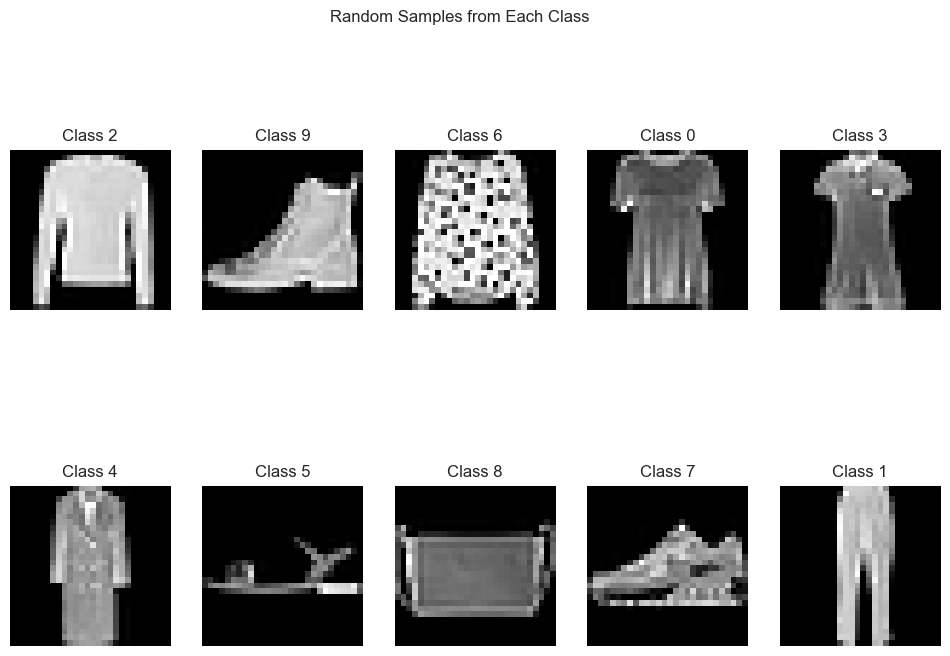

In [64]:
class_labels = dataset_train['label'].unique()
num_classes = len(class_labels)

plt.figure(figsize=(12, 8))
for i, label in enumerate(class_labels):
    plt.subplot(2, 5, i + 1)
    class_samples = dataset_train[dataset_train['label'] == label].drop(['label', 'label_name'], axis=1).values
    random_sample = class_samples[np.random.randint(0, len(class_samples))]
    plt.imshow(random_sample.reshape(28, 28), cmap='gray')
    plt.title(f"Class {label}")
    plt.axis('off')
plt.suptitle("Random Samples from Each Class")
plt.show()

### Data Scaling & Normalization

In [5]:
Y = dataset_train['label']
X = dataset_train.drop(['label', 'label_name'], axis=1)  

In [6]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_normalized = normalize(X_scaled)
X = pd.DataFrame(X_normalized)
X = pd.DataFrame(X)

In [67]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,-0.000292,-0.000698,-0.000889,-0.001278,-0.001770,-0.002168,-0.003016,-0.004796,-0.007335,-0.011621,...,-0.018501,-0.014665,-0.012150,-0.012497,-0.013535,-0.012198,-0.008847,-0.004866,-0.002811,-0.001016
1,-0.000370,-0.000884,-0.001126,-0.001619,-0.002243,-0.002747,-0.003822,-0.006078,-0.009295,-0.014728,...,-0.023446,-0.018585,-0.015398,-0.015837,-0.017152,-0.015459,-0.011211,-0.006167,-0.003563,-0.001288
2,-0.000373,-0.000891,-0.001135,-0.001632,-0.002260,-0.002768,-0.003851,0.007805,-0.009365,-0.014839,...,-0.023623,-0.018725,-0.015514,0.010832,0.015290,-0.015575,-0.011296,-0.006213,-0.003590,-0.001297
3,-0.000403,-0.000962,-0.001226,0.015529,0.017254,-0.002990,-0.004160,-0.006616,-0.010118,-0.016031,...,-0.023310,-0.020229,-0.016760,-0.017239,-0.018670,-0.015887,-0.012203,-0.006712,-0.003878,-0.001402
4,-0.000385,-0.000920,-0.001172,-0.001685,-0.002334,-0.002858,-0.003976,-0.006324,-0.009671,-0.015323,...,-0.024394,-0.019336,-0.016020,-0.016477,-0.017845,-0.016083,-0.011664,-0.006416,-0.003707,-0.001340


## PCA sentimentality reduction


In [68]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
data_pca = pca.fit_transform(X)

data_pca = pd.DataFrame(data_pca, columns=['pixel1', 'pixel2', 'pixel3'])

data_pca["label"] = Y

data_pca

,pixel1,pixel2,pixel3,label
0,-0.312016,-0.529822,-0.169077,2
1,0.468679,-0.487026,-0.316741,9
2,-0.823919,-0.226274,0.229459,6
3,-0.426068,0.222853,0.033829,0
4,-0.530604,0.397604,-0.297931,3
...,...,...,...,...
59995,-0.023004,-0.547253,-0.321862,9
59996,0.405191,0.694493,0.037234,1
59997,-0.316387,-0.079755,-0.080096,8
59998,-0.101312,-0.611040,-0.085617,8


In [69]:
print(pca.explained_variance_ratio_)

[0.23905196 0.15489282 0.07215288]


<Axes: >

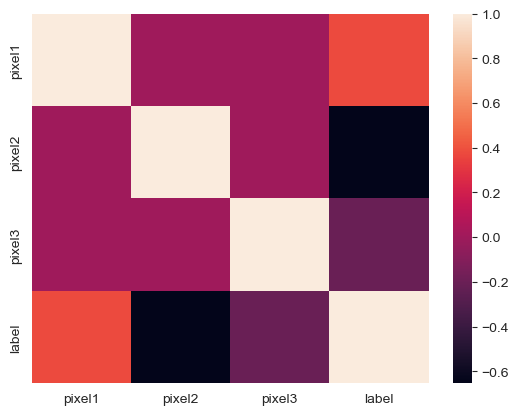

In [70]:
seaborn.heatmap(data_pca.corr())

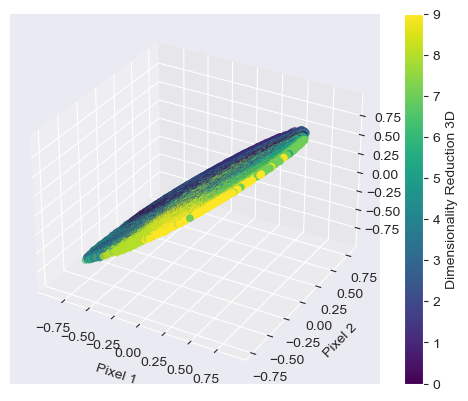

In [71]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(
    data_pca["pixel1"],
    data_pca["pixel2"],
    data_pca["pixel1"],
    c=data_pca["label"],
    cmap='viridis'
)

ax.set_xlabel('Pixel 1')
ax.set_ylabel('Pixel 2')
ax.set_zlabel('Pixel 3')

# Adding color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Dimensionality Reduction 3D')

plt.show()

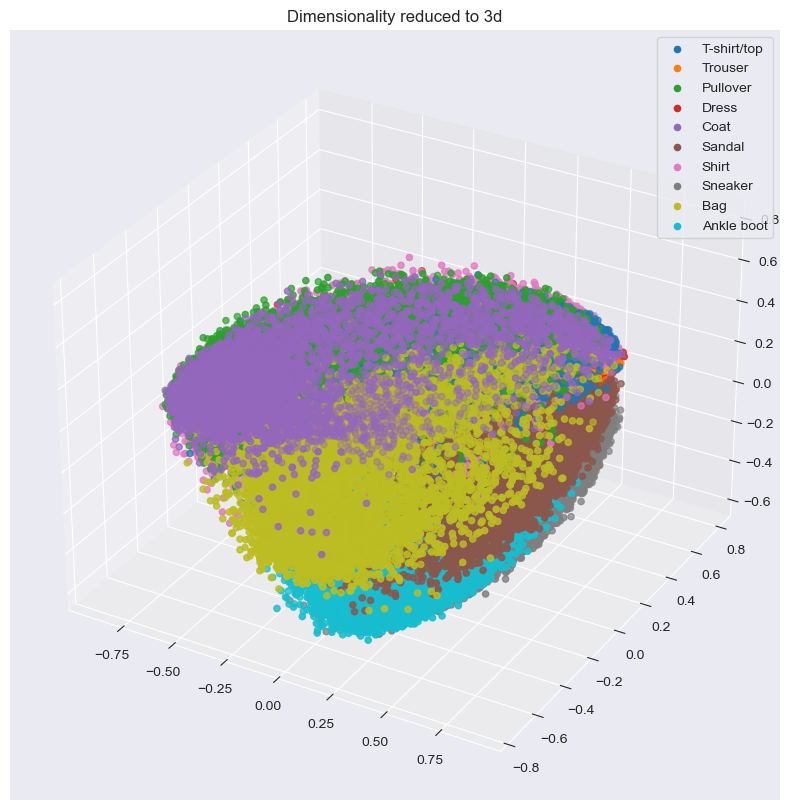

In [83]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

groups = data_pca.groupby("label")
for name, group in groups:
    ax.scatter(group["pixel1"], group["pixel2"], group["pixel3"], marker="o", label=class_labels_mapping[name])
ax.legend()
t=ax.set_title("Dimensionality reduced to 3d")

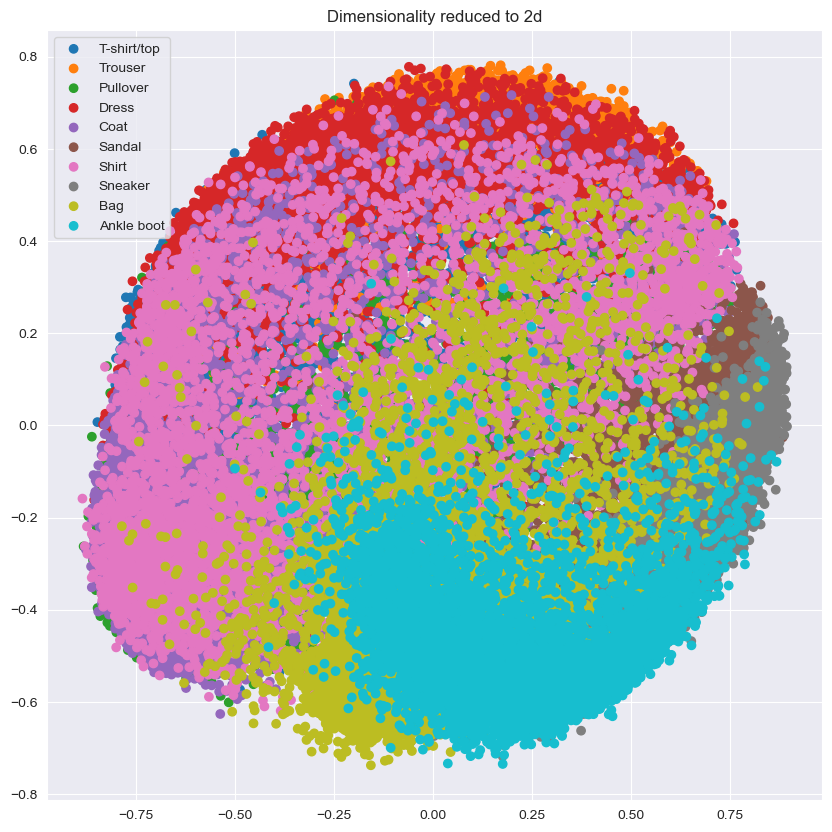

In [88]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()

groups = data_pca.groupby("label")
for name, group in groups:
    ax.scatter(group["pixel1"], group["pixel2"], marker="o", linestyle="", label=class_labels_mapping[name])
ax.legend()
t = ax.set_title("Dimensionality reduced to 2d")

### Scree Plot 

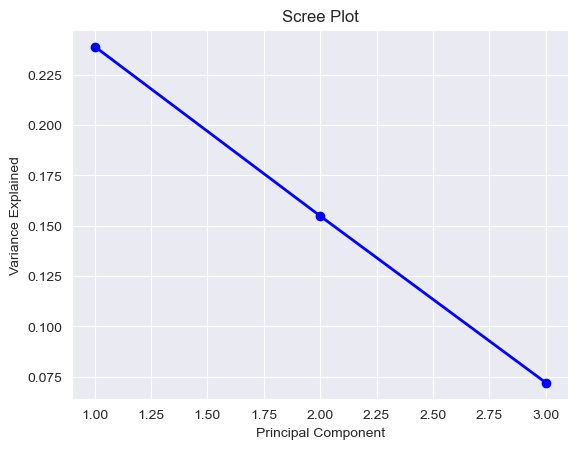

In [91]:
PC_values = np.arange( pca.n_components_ ) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [7]:
from sklearn.decomposition import PCA

In [8]:
mle = PCA(n_components='mle')
mle.fit(X)
explained_variance = mle.explained_variance_

cumsum = np.cumsum(explained_variance)
d = np.argmax(cumsum >= 0.95) + 1

print(f'Dimensions: {d}')

explained_variance

Dimensions: 273


array([2.38052509e-01, 1.54245230e-01, 7.18512193e-02, 4.50875837e-02,
       3.62937275e-02, 3.40413200e-02, 2.35382866e-02, 1.73230830e-02,
       1.49499162e-02, 1.41481940e-02, 1.16438611e-02, 9.47528933e-03,
       8.55702119e-03, 7.28604629e-03, 6.99088501e-03, 6.24692639e-03,
       6.09724051e-03, 5.61799432e-03, 5.44532524e-03, 5.05604053e-03,
       4.99703549e-03, 4.62626285e-03, 4.40280321e-03, 4.35552586e-03,
       4.07421384e-03, 4.05990026e-03, 3.88315397e-03, 3.80843040e-03,
       3.58859710e-03, 3.39895073e-03, 3.32837364e-03, 3.22541191e-03,
       3.10339174e-03, 2.97514522e-03, 2.87448218e-03, 2.78813842e-03,
       2.66834375e-03, 2.60835444e-03, 2.45800539e-03, 2.42226040e-03,
       2.33493357e-03, 2.32772221e-03, 2.29693919e-03, 2.26975553e-03,
       2.20061668e-03, 2.14039049e-03, 2.10970659e-03, 2.03651327e-03,
       2.00709048e-03, 1.94447099e-03, 1.88089551e-03, 1.85919164e-03,
       1.82878801e-03, 1.74458788e-03, 1.70337232e-03, 1.68506655e-03,
      

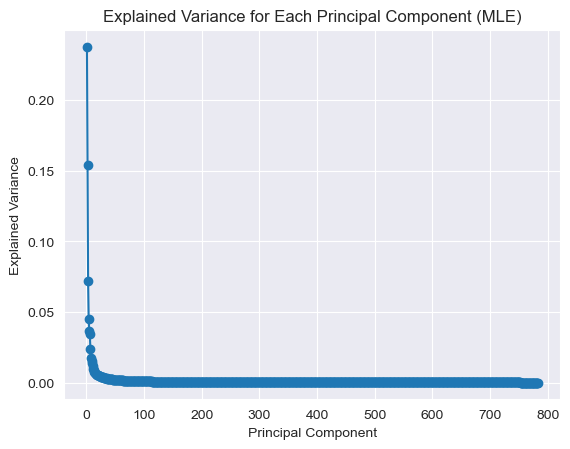

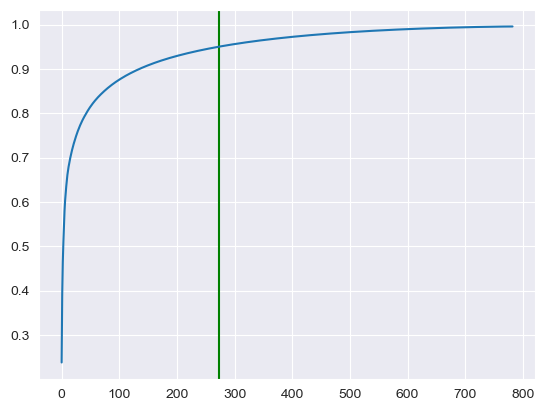

In [10]:
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title('Explained Variance for Each Principal Component (MLE)')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')


fig = plt.figure()
ax = fig.add_subplot()
ax.axvline(x=273, color='g', linestyle='-')
ax.plot(cumsum)

plt.show()

## t-SNE dimensionality reduction

In [97]:
ds_train_t_sne = pd.read_csv('./data/fashion-mnist_train.csv')
ds_test_t_sne = pd.read_csv('./data/fashion-mnist_test.csv')

In [98]:
X_T_SNE = ds_train_t_sne.drop(['label'], axis=1)
Y_T_SNE = ds_train_t_sne['label']

scaler = StandardScaler()
X_T_SNE_scaled = scaler.fit_transform(X_T_SNE)
X_T_SNE_normalized = normalize(X_T_SNE_scaled)
X_T_SNE = pd.DataFrame(X_T_SNE_normalized)

In [99]:
from sklearn.manifold import TSNE

data_embedded = TSNE(n_components=3, learning_rate='auto', init='random', perplexity=3).fit_transform(X_T_SNE)
data_embedded = pd.DataFrame(data_embedded, columns=["T1", "T2", "T3"])
data_embedded["type"] = Y
data_embedded.head()

,T1,T2,T3,type
0,-1.950235,5.549696,8.630512,2
1,-13.744787,41.815517,2.716360,9
2,-2.714889,0.283052,-28.672611,6
3,-0.427914,28.989519,20.361349,0
4,14.001892,33.598927,-6.399810,3


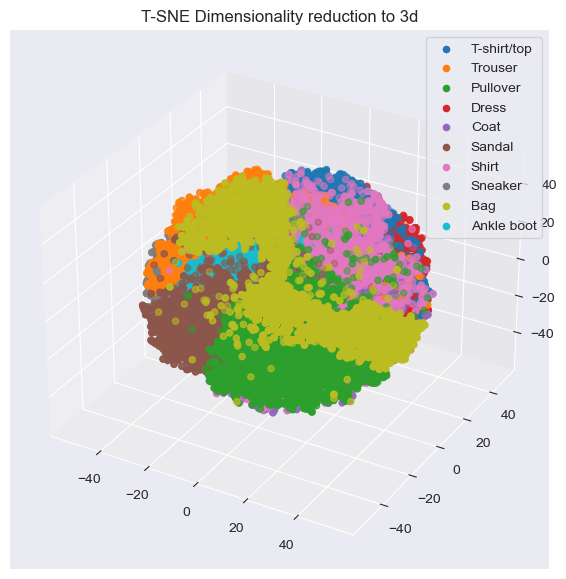

In [104]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='3d')

groups = data_embedded.groupby("type")
for name, group in groups:
    ax.scatter(group["T1"], group["T2"], group["T3"], marker="o", label=class_labels_mapping[name])
ax.legend()
t=ax.set_title("T-SNE Dimensionality reduction to 3d")

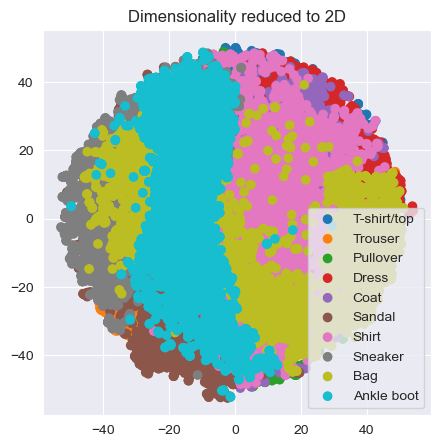

In [102]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot()

groups = data_embedded.groupby("type")
for name, group in groups:
    ax.scatter(group["T1"], group["T2"], marker="o", linestyle="", label=class_labels_mapping[name])
ax.legend()
t = ax.set_title("Dimensionality reduced to 2D")

## Cluster analysis

In [8]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import adjusted_rand_score

### Agglomerate Clustering

#### WARD DISTANCE MEASUREMENT
This method minimizes the variance when merging clusters. It tends to produce compact and spherical clusters. It is often used with Euclidean distance.

#### AVERAGE
This method merges clusters based on the average distance between their individual members. It can produce balanced clusters.

#### SINGLE
This method merges clusters based on the minimum distance between their individual members. It tends to form long, “string-like” clusters.

#### CENTROID

This method merges clusters based on the distance between their centroids (the average position of all points in the cluster).

### COMPLETE

This method merges clusters based on the maximum distance between their individual members. It tends to form compact, spherical clusters.

In [6]:
cluster_linkages = ["ward", "average", "single", "complete"]
cluster_metrics = ["euclidean"]
clusters_scores={}
clusters_labels={}

In [9]:
for metric in cluster_metrics:
    for linkage in cluster_linkages:
        hierarchical_clustering = AgglomerativeClustering(n_clusters = 10, metric=metric, linkage=linkage)
        cluster_labels = hierarchical_clustering.fit_predict(X)
        clusters_scores[metric + "_" + linkage] = adjusted_rand_score(Y, cluster_labels)
        clusters_labels[metric + "_" + linkage] = cluster_labels

In [17]:
print(clusters_scores)

{'euclidean_ward': 0.4974453791752758, 'euclidean_average': 0.2776299605953962, 'euclidean_single': 2.9646932075815762e-09, 'euclidean_complete': 0.26427438353147165}


In [18]:
print(clusters_labels)

{'euclidean_ward': array([0, 2, 8, ..., 0, 0, 9]), 'euclidean_average': array([9, 9, 4, ..., 0, 9, 6]), 'euclidean_single': array([0, 0, 0, ..., 0, 0, 0]), 'euclidean_complete': array([1, 4, 0, ..., 7, 1, 4])}


### Export

In [20]:
labels_df = pd.DataFrame.from_dict(clusters_labels, orient='index').transpose()
scores_df = pd.DataFrame.from_dict(clusters_scores, orient='index', columns=['Adjusted Rand Score'])

result_df = pd.concat([labels_df, scores_df], axis=1)

result_df.to_csv('./data/models/cluster_results.csv', index=False)

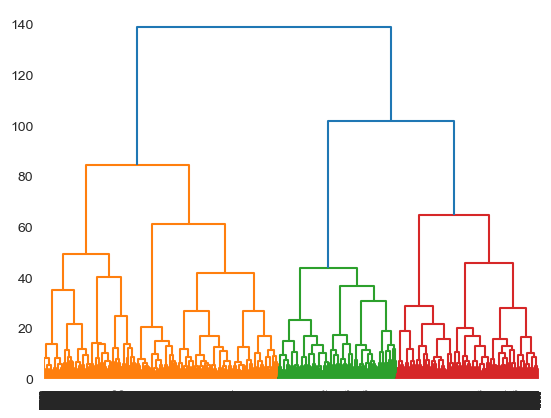

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage

# ward is the parameter of how do we measure distances between clusters
linkage_matrix = linkage(X, 'ward')

dendrogram(linkage_matrix)

plt.show()

In [10]:
from sklearn.metrics import adjusted_rand_score

def analyze_clusters(cluster_labels, true_labels, classes_mapping):
    """
    Analyzes clusters and presents the corresponding clothes classes.

    Parameters:
    - cluster_labels (array): Array containing cluster labels for each data point.
    - true_labels (array): Array containing true class labels for each data point.
    - classes_mapping (dict): Dictionary mapping true class labels to corresponding clothing classes.

    Returns:
    - cluster_analysis (DataFrame): DataFrame containing cluster analysis results.
    """
    analysis_df = pd.DataFrame({'True Labels': true_labels, 'Cluster Labels': cluster_labels})
    analysis_df['Clothing Classes'] = analysis_df['True Labels'].map(classes_mapping)

    cluster_analysis = analysis_df.groupby('Cluster Labels')['Clothing Classes'].unique().reset_index()

    return cluster_analysis

In [11]:
true_labels = Y  
classes_mapping = class_labels_mapping
cluster_analysis_result = analyze_clusters(clusters_labels["euclidean_ward"], true_labels, classes_mapping)
print(cluster_analysis_result)

   Cluster Labels                                   Clothing Classes
0               0  [Pullover, Bag, Coat, Dress, T-shirt/top, Shir...
1               1  [Coat, T-shirt/top, Pullover, Bag, Shirt, Dres...
2               2  [Ankle boot, Sneaker, Bag, Sandal, T-shirt/top...
3               3  [Sandal, Ankle boot, Sneaker, T-shirt/top, Bag...
4               4  [Dress, Trouser, T-shirt/top, Coat, Bag, Pullo...
5               5  [Pullover, Coat, Dress, T-shirt/top, Shirt, Tr...
6               6  [Dress, Coat, T-shirt/top, Pullover, Shirt, Tr...
7               7   [T-shirt/top, Shirt, Dress, Bag, Pullover, Coat]
8               8  [Shirt, Coat, Pullover, Dress, T-shirt/top, Ba...
9               9                 [Sneaker, Sandal, Ankle boot, Bag]


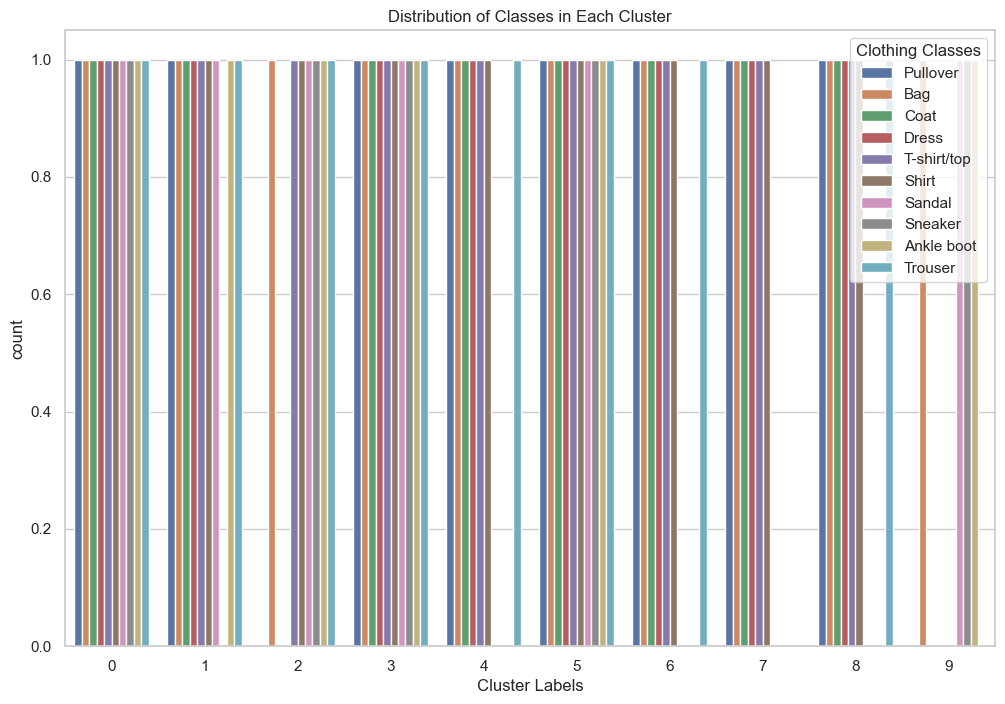

In [12]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.countplot(x="Cluster Labels", hue="Clothing Classes", data=cluster_analysis_result.explode('Clothing Classes'))
plt.title('Distribution of Classes in Each Cluster')
plt.show()

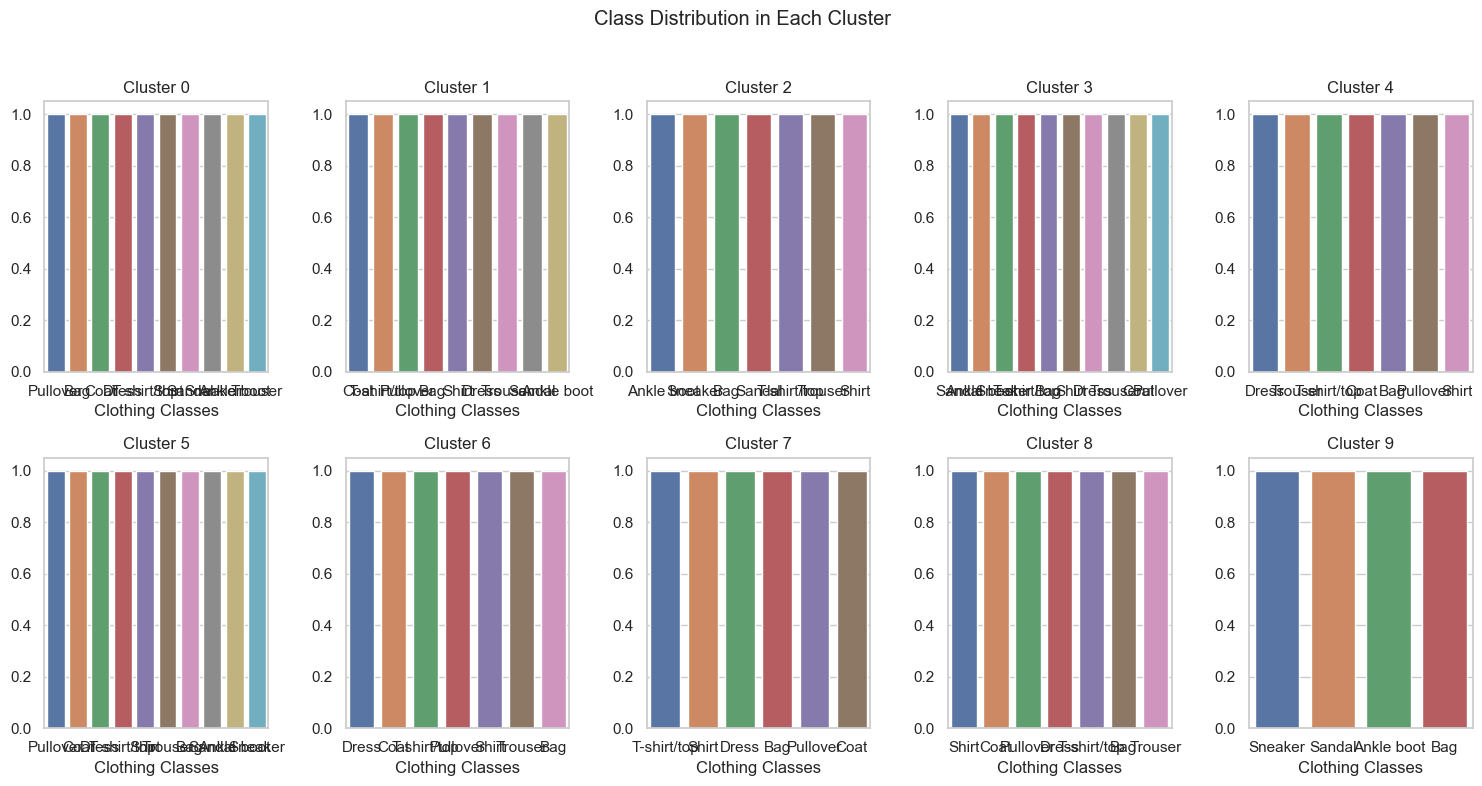

In [15]:
fig, axes = plt.subplots(2, 5, figsize=(15, 8))
fig.suptitle('Class Distribution in Each Cluster')

for cluster_label, ax in zip(range(10), axes.flatten()):
    cluster_data = cluster_analysis_result[cluster_analysis_result['Cluster Labels'] == cluster_label]

    # Count the occurrences of each class in the cluster
    class_counts = cluster_data.explode('Clothing Classes')['Clothing Classes'].value_counts()

    # Plot the class distribution
    sns.barplot(x=class_counts.index, y=class_counts.values, ax=ax)
    ax.set_title(f'Cluster {cluster_label}')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to avoid title overlap
plt.show()

## KMEANS CLUSTERING

#### In order to cluster this time I shall reduce dimensionality as i previously figured to 273

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=273)
data_pca = pca.fit_transform(X)
data_pca = pd.DataFrame(data_pca, columns=[f'PC{i}' for i in range(1, 274)])
data_pca["label"] = Y
data_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC265,PC266,PC267,PC268,PC269,PC270,PC271,PC272,PC273,label
0,-0.312016,-0.529822,-0.169077,-0.119725,0.192709,-0.085820,0.075285,0.325952,-0.058218,-0.027234,...,-0.010072,0.028253,0.010292,0.012440,0.000138,0.022394,0.000874,-0.011033,0.033089,2
1,0.468679,-0.487026,-0.316741,0.003258,-0.091013,0.106870,-0.162210,0.061447,0.058851,-0.264414,...,-0.034672,-0.014185,0.011385,0.012144,-0.014252,-0.013334,-0.011285,0.003410,0.001532,9
2,-0.823919,-0.226274,0.229459,-0.180549,-0.004718,0.175959,-0.063138,0.002420,-0.059097,0.024537,...,-0.002710,-0.004322,0.009848,-0.009782,-0.011476,-0.012952,0.003000,0.000353,0.001835,6
3,-0.426068,0.222853,0.033829,0.384828,0.333982,-0.219662,-0.157270,-0.083452,-0.059967,-0.040277,...,0.004724,0.026016,0.012491,0.007905,0.021630,0.006152,-0.010729,-0.012512,-0.030829,0
4,-0.530604,0.397604,-0.297931,-0.128483,0.053901,0.041478,-0.086027,-0.005686,-0.250955,0.103707,...,0.008827,-0.001411,0.013013,0.005995,-0.016539,0.003944,0.002161,-0.004358,0.012613,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,-0.023004,-0.547253,-0.321862,0.371567,-0.387251,-0.012285,-0.178994,-0.089120,-0.034821,0.063979,...,0.035987,-0.008743,-0.015618,-0.015670,0.001181,-0.007230,0.012190,0.002721,0.009463,9
59996,0.405191,0.694493,0.037234,0.030186,-0.213372,0.001779,0.152731,0.114509,0.062022,-0.090793,...,0.006928,-0.006685,-0.005615,0.001052,-0.016748,-0.014546,0.001564,0.009968,-0.007881,1
59997,-0.316387,-0.079755,-0.080096,-0.008237,0.087890,0.753036,0.092685,-0.009075,0.099272,-0.018738,...,-0.021087,0.014479,0.003653,0.011405,-0.025821,-0.012891,-0.023067,0.012061,0.000177,8
59998,-0.101312,-0.611040,-0.085617,0.112684,-0.035897,0.086552,0.321829,0.271984,0.030855,0.095038,...,-0.030235,-0.020109,-0.020579,0.007484,0.000876,-0.027089,-0.013386,-0.019475,-0.012073,8


In [8]:
reduced_X = data_pca.drop("label", axis=1)
reduced_Y = data_pca["label"]

#### Default Kmeans

In [13]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=42, n_init="auto").fit(X)
kmeans.labels_

array([3, 5, 6, ..., 0, 3, 9], dtype=int32)

In [22]:
adjusted_rand_score(Y, kmeans.labels_)

0.3620295942705305

#### Testing better params and initialization function 

In [27]:
kmeans = KMeans(n_clusters=10, random_state=42, n_init=30, init='k-means++').fit(X_scaled)
kmeans.labels_

array([1, 8, 5, ..., 9, 9, 3], dtype=int32)

In [28]:
adjusted_rand_score(Y, kmeans.labels_)

0.34995930818087545

#### With reduced dimensionality

In [26]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=42, n_init="auto").fit(reduced_X)
km_labels = kmeans.labels_

km_df = pd.DataFrame({'Cluster_Labels': km_labels})
result_df_with_clusters = pd.concat([data_pca, km_df], axis=1)

result_df_with_clusters.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC266,PC267,PC268,PC269,PC270,PC271,PC272,PC273,label,Cluster_Labels
0,-0.312016,-0.529822,-0.169077,-0.119725,0.192709,-0.085820,0.075285,0.325952,-0.058218,-0.027234,...,-0.013787,-0.015117,-0.020889,0.001861,0.006156,-0.027950,0.027061,-0.004415,2,9
1,0.468679,-0.487026,-0.316741,0.003258,-0.091013,0.106870,-0.162210,0.061447,0.058851,-0.264414,...,0.009697,0.013839,-0.018806,0.015045,-0.010500,0.011670,-0.022076,0.003823,9,1
2,-0.823919,-0.226274,0.229459,-0.180549,-0.004718,0.175959,-0.063138,0.002420,-0.059097,0.024537,...,-0.017654,-0.006591,-0.000329,0.000701,0.006894,0.000919,0.009457,-0.002154,6,2
3,-0.426068,0.222853,0.033829,0.384828,0.333982,-0.219662,-0.157270,-0.083452,-0.059967,-0.040277,...,-0.045036,0.004207,0.006411,0.005822,-0.029919,0.023173,-0.023630,0.026976,0,7
4,-0.530604,0.397604,-0.297931,-0.128483,0.053901,0.041478,-0.086027,-0.005686,-0.250955,0.103707,...,0.003765,-0.007226,0.005233,0.003790,-0.008360,0.015634,0.008712,0.016520,3,3


In [34]:
adjusted_rand_score_value = adjusted_rand_score(Y, km_labels)
print(f"Adjusted Rand Score: {adjusted_rand_score_value}")

Adjusted Rand Score: 0.3623658061491089


In [22]:
def label_str(label_value):
    clothing_classes = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}
    return clothing_classes.get(label_value, str(label_value))

In [32]:
grouped_by_cluster = result_df_with_clusters.groupby("Cluster_Labels")
class_counts_by_cluster = grouped_by_cluster["label"].value_counts()
class_counts_by_cluster

Cluster_Labels  label
0               9        2987
                5         664
                7          32
                8          14
                0           4
                         ... 
9               0         111
                4          58
                3          15
                1           9
                5           3
Name: count, Length: 78, dtype: int64

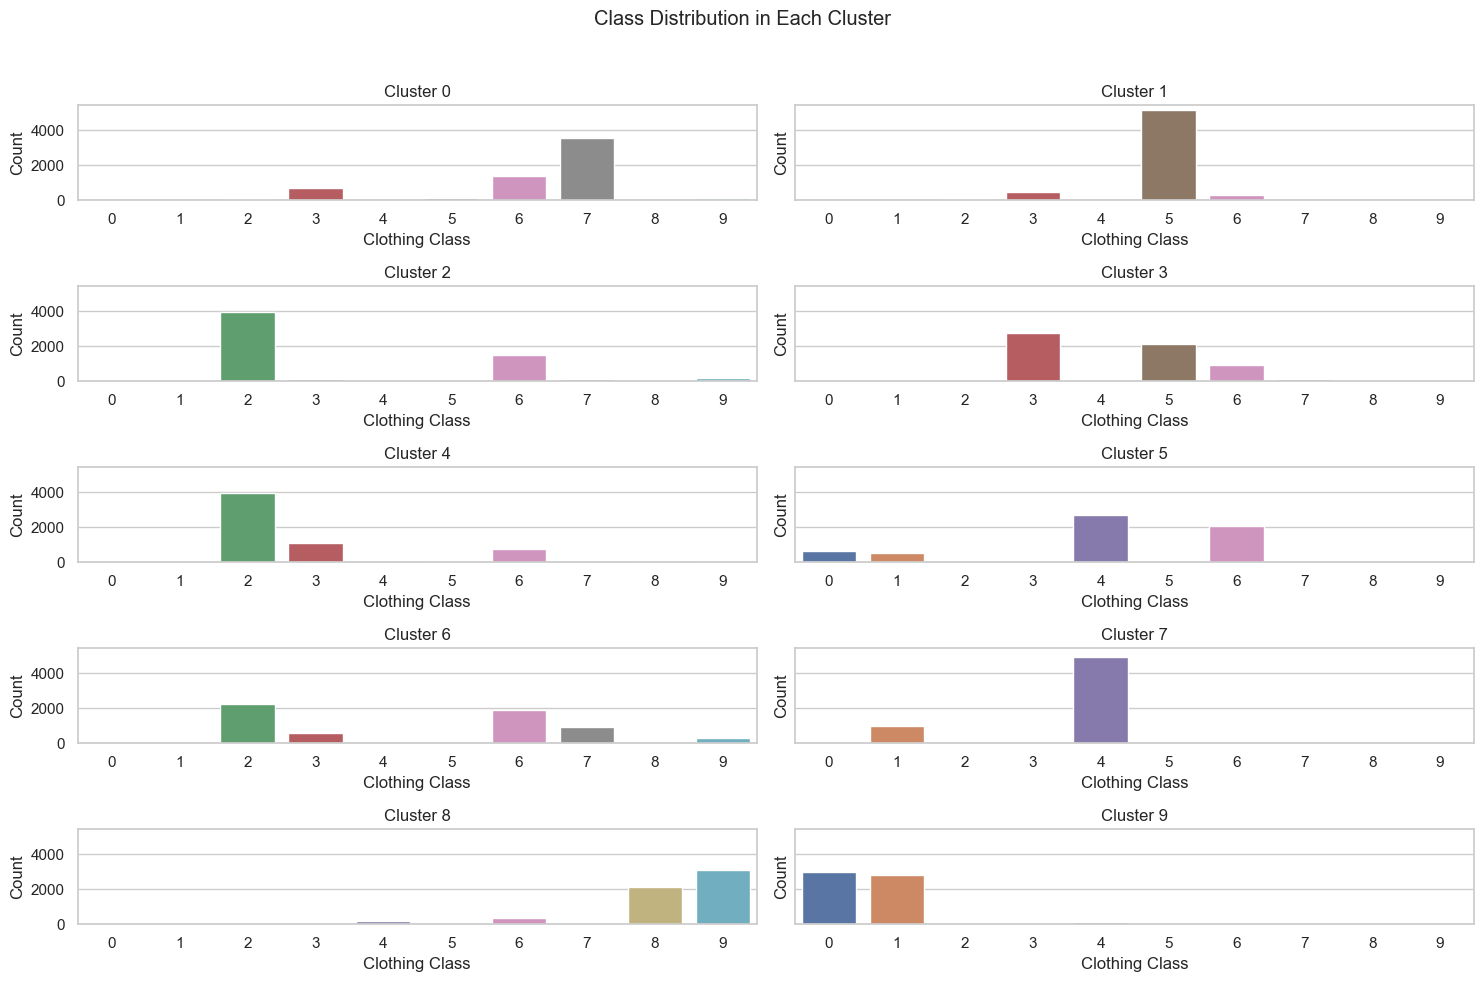

In [33]:
class_counts_df = class_counts_by_cluster.unstack()

# Create the grid
fig, axs = plt.subplots(5, 2, sharey=True, figsize=(15, 10))
fig.suptitle('Class Distribution in Each Cluster')

# Iterate through each cluster and plot the bar chart in the corresponding grid cell
for cluster_label, ax in zip(class_counts_df.columns, axs.flatten()):
    cluster_data = class_counts_df[cluster_label].sort_index()

    # Plot the bar chart
    sns.barplot(x=cluster_data.index, y=cluster_data.values, ax=ax)
    ax.set_title(f'Cluster {cluster_label}')
    ax.set_xlabel('Clothing Class')
    ax.set_ylabel('Count')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to avoid title overlap
plt.show()

## DBSCAN CLUSTERING

In [9]:
from sklearn.cluster import DBSCAN

In [10]:
epsilon_value = 0.5
min_samples_value = 5

dbscan = DBSCAN(eps=epsilon_value, min_samples=min_samples_value).fit(X)
dbscan_labels = dbscan.labels_

In [11]:
print(np.unique(dbscan_labels)) # unique values

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55 56 57 58 59 60]


In [12]:
from sklearn.metrics import silhouette_score
silhouette_score_value = silhouette_score(X, dbscan_labels)

print(f'Silhouette score: {silhouette_score_value}')

Silhouette score: -0.32184113035698253


Here's a brief interpretation of Silhouette scores:

- Near +1: Indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. This is a desirable scenario.

- Near 0: Indicates that the object is on or very close to the decision boundary between two neighboring clusters. It might be on the border of two clusters.

- Near -1: Indicates that the object is probably placed in the wrong cluster. This is an undesirable scenario.

#### With Reduced dimensionality

In [39]:
from sklearn.cluster import DBSCAN

epsilon_value = 0.5
min_samples_value = 5

dbscan = DBSCAN(eps=epsilon_value, min_samples=min_samples_value).fit(reduced_X)
dbscan_labels = dbscan.labels_

In [36]:
adjusted_rand_score_value_dbscan = adjusted_rand_score(Y, dbscan_labels)
print(f"Adjusted Rand Score: {adjusted_rand_score_value_dbscan}")

Adjusted Rand Score: 0.015770475563728608


In [41]:
df_dbscan = pd.DataFrame({'DBSCAN_Labels': dbscan_labels})
data_pca_dbscan = pd.concat([data_pca, df_dbscan], axis=1)
grouped_by_dbscan = data_pca_dbscan.groupby('DBSCAN_Labels')
for label, group in grouped_by_dbscan:
    print(f"Counts for DBSCAN label {label}: {len(group)}")

Counts for DBSCAN label -1: 17730
Counts for DBSCAN label 0: 41982
Counts for DBSCAN label 1: 52
Counts for DBSCAN label 2: 5
Counts for DBSCAN label 3: 9
Counts for DBSCAN label 4: 53
Counts for DBSCAN label 5: 17
Counts for DBSCAN label 6: 9
Counts for DBSCAN label 7: 9
Counts for DBSCAN label 8: 5
Counts for DBSCAN label 9: 3
Counts for DBSCAN label 10: 6
Counts for DBSCAN label 11: 6
Counts for DBSCAN label 12: 4
Counts for DBSCAN label 13: 9
Counts for DBSCAN label 14: 6
Counts for DBSCAN label 15: 5
Counts for DBSCAN label 16: 7
Counts for DBSCAN label 17: 6
Counts for DBSCAN label 18: 8
Counts for DBSCAN label 19: 5
Counts for DBSCAN label 20: 5
Counts for DBSCAN label 21: 5
Counts for DBSCAN label 22: 6
Counts for DBSCAN label 23: 7
Counts for DBSCAN label 24: 4
Counts for DBSCAN label 25: 5
Counts for DBSCAN label 26: 2
Counts for DBSCAN label 27: 6
Counts for DBSCAN label 28: 5
Counts for DBSCAN label 29: 5
Counts for DBSCAN label 30: 5
Counts for DBSCAN label 31: 5
Counts fo

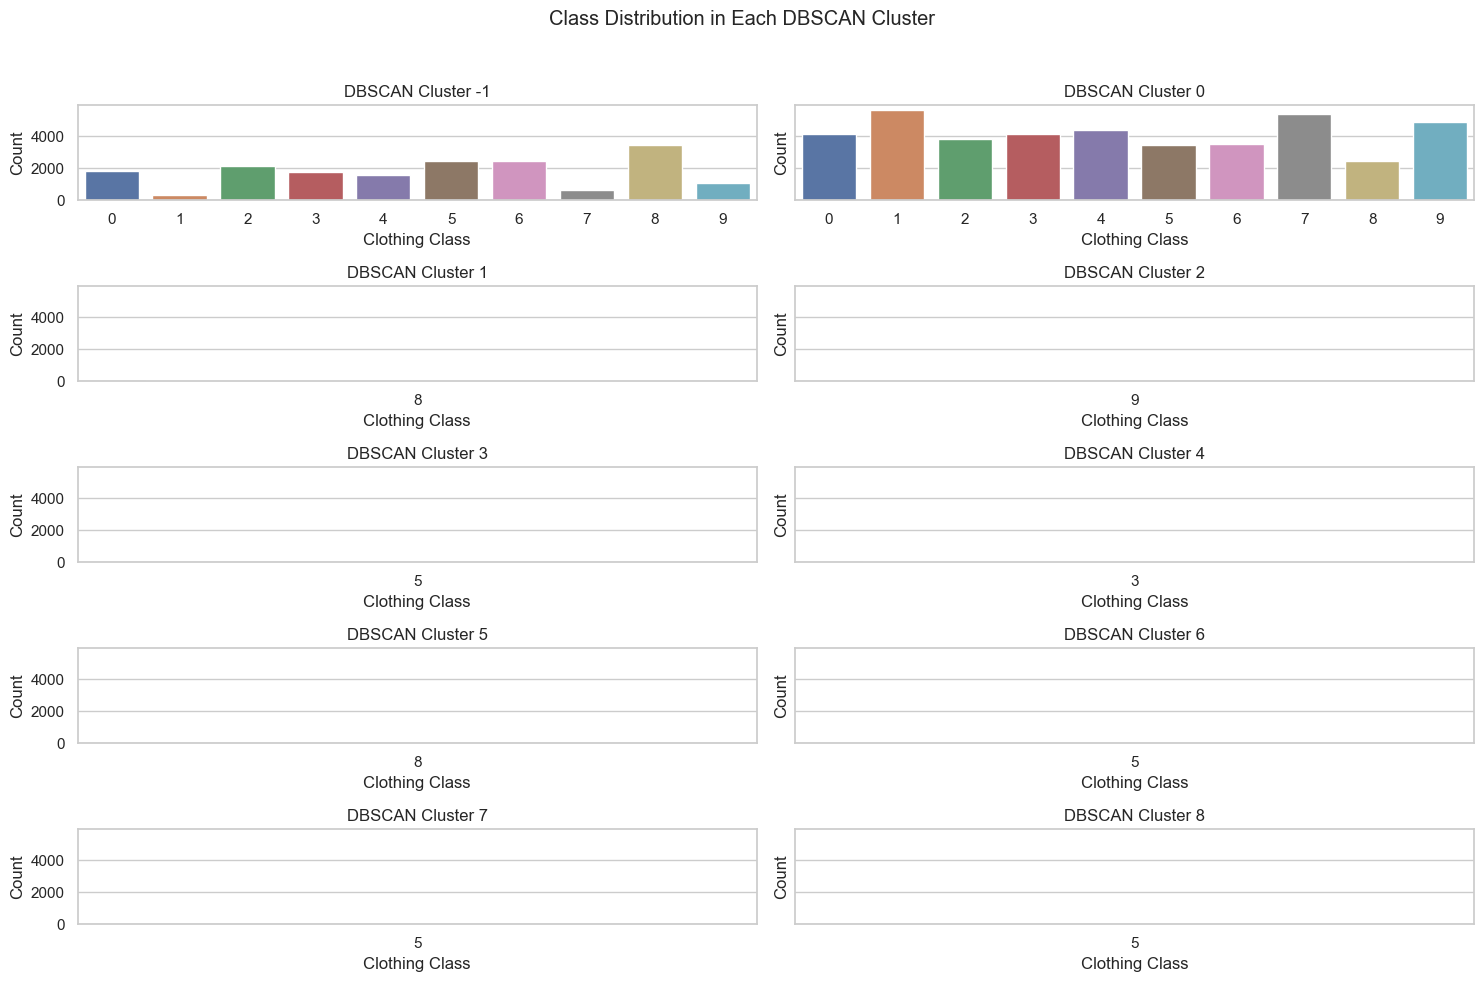

In [42]:
fig, axs = plt.subplots(5, 2, sharey=True, figsize=(15, 10))
fig.suptitle('Class Distribution in Each DBSCAN Cluster')

# Iterate through each DBSCAN cluster and plot the bar chart in the corresponding grid cell
for label, ax in zip(grouped_by_dbscan.groups.keys(), axs.flatten()):
    cluster_data = grouped_by_dbscan.get_group(label)['label'].value_counts().sort_index()

    # Plot the bar chart
    sns.barplot(x=cluster_data.index, y=cluster_data.values, ax=ax)
    ax.set_title(f'DBSCAN Cluster {label}')
    ax.set_xlabel('Clothing Class')
    ax.set_ylabel('Count')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to avoid title overlap
plt.show()

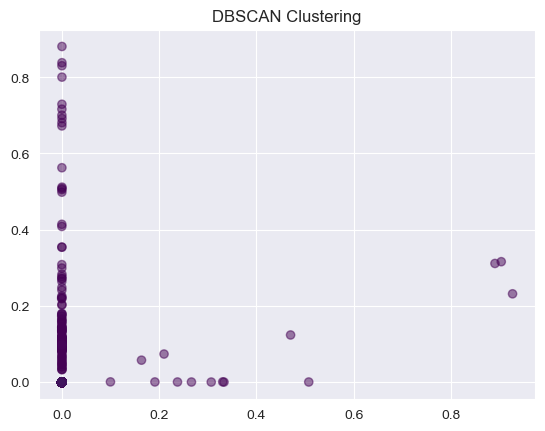

In [33]:
plt.scatter(X.values[:, 0], X.values[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.5)
plt.title("DBSCAN Clustering")
plt.show()

## In order to find the right parameters for DBSCAN that will find just 10 clusters I attempt to utilize a simple genetic algorithm 

In [15]:
! pip install geneticalgorithm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 944.9 kB/s eta 0:00:00 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15080 sha256=cf0ccae0c1553dde7ff478287b9f60903b75c059add3b5adbc738bc0ca5f32ef
  Stored in directory: /home/andrzej/.cache/pip/wheels/a8/92/ca/5bbab358275e310af23b73fc32ebf37d6a7a08c87c8d2cdbc1
Successfully built func-timeout


In [34]:
subset_size = 1000
subset_indices = np.random.choice(X.index, subset_size, replace=False)
X_subset = X.loc[subset_indices]

In [35]:
def objective_function(params):
    eps, min_samples = params
    min_samples = int(round(min_samples))
    dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X_subset)
    dbscan_labels = dbscan.labels_
    unique_labels = np.unique(dbscan_labels)
    if len(unique_labels) == 10:
        silhouette_score_value = silhouette_score(X_subset, dbscan_labels)
        return -silhouette_score_value  # Negative because the genetic algorithm minimizes
    else:
        return 0  # Returning 0 if the condition is not met

 The best solution found:                                                                           
 [0.62636983 6.75922169]

 Objective function:
 0


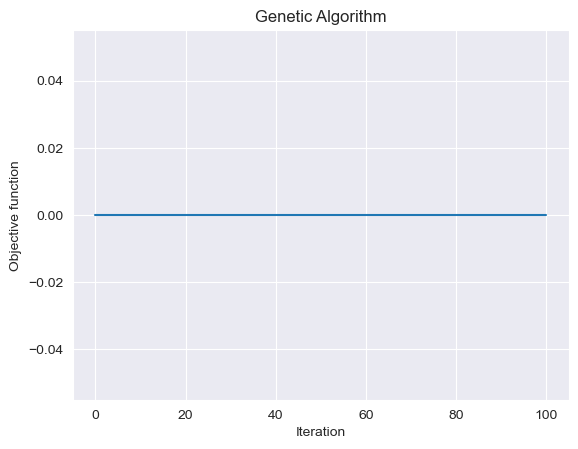

In [39]:
from geneticalgorithm import geneticalgorithm as ga

varbound = np.array([[0.1, 1.0], [1, 10]])

algorithm_param = {
    'max_num_iteration': 100,
    'population_size': 100,
    'mutation_probability': 0.1,
    'elit_ratio': 0.01,
    'crossover_probability': 0.5,
    'crossover_type': 'uniform',
    'max_iteration_without_improv': None,
    'multiprocessing': False,
    'verbose': False,
    'random_seed': None,
    'chromosome_mutation_prob': 0.5,
    'parents_portion': 0.3  # Add this line
}
model = ga(
    function=objective_function,
    dimension=2,
    variable_type='real',
    variable_boundaries=varbound, 
    algorithm_parameters=algorithm_param
)

model.run()

best_params = model.output_dict['variable']
best_eps, best_min_samples = best_params

In [40]:
best_dbscan = DBSCAN(eps=best_eps, min_samples=int(best_min_samples)).fit(X)
best_dbscan_labels = best_dbscan.labels_
print(np.unique(best_dbscan_labels))

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13]


In [38]:
silhouette_score_value_ga = silhouette_score(X, best_dbscan_labels)

print(f'Silhouette score: {silhouette_score_value_ga}')

Silhouette score: -0.44818901729529254


## Gaussian Mixture Models (GMM)

GMM is a probabilistic model that can handle more complex distributions. It may be a good choice if the data has overlapping clusters or if you want to assign probabilities to data points belonging to each cluster.

In [43]:
from sklearn.mixture import GaussianMixture

# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=10, random_state=42)
gmm.fit(reduced_X)

cluster_labels_gmm = gmm.predict(reduced_X)

In [10]:
cluster_labels_gmm

array([3, 5, 1, ..., 0, 3, 9])

In [44]:
df_gmm = pd.DataFrame({'GMM_Labels': cluster_labels_gmm})

data_pca_gmm = pd.concat([data_pca, df_gmm], axis=1)

grouped_by_gmm = data_pca_gmm.groupby('GMM_Labels')

print("Number of different GMM labels:", len(grouped_by_gmm))

for label, group in grouped_by_gmm:
    print(f"Counts for GMM label {label}: {len(group)}")

Number of different GMM labels: 10
Counts for GMM label 0: 3924
Counts for GMM label 1: 5685
Counts for GMM label 2: 8664
Counts for GMM label 3: 8468
Counts for GMM label 4: 8240
Counts for GMM label 5: 8106
Counts for GMM label 6: 5561
Counts for GMM label 7: 4921
Counts for GMM label 8: 2304
Counts for GMM label 9: 4127


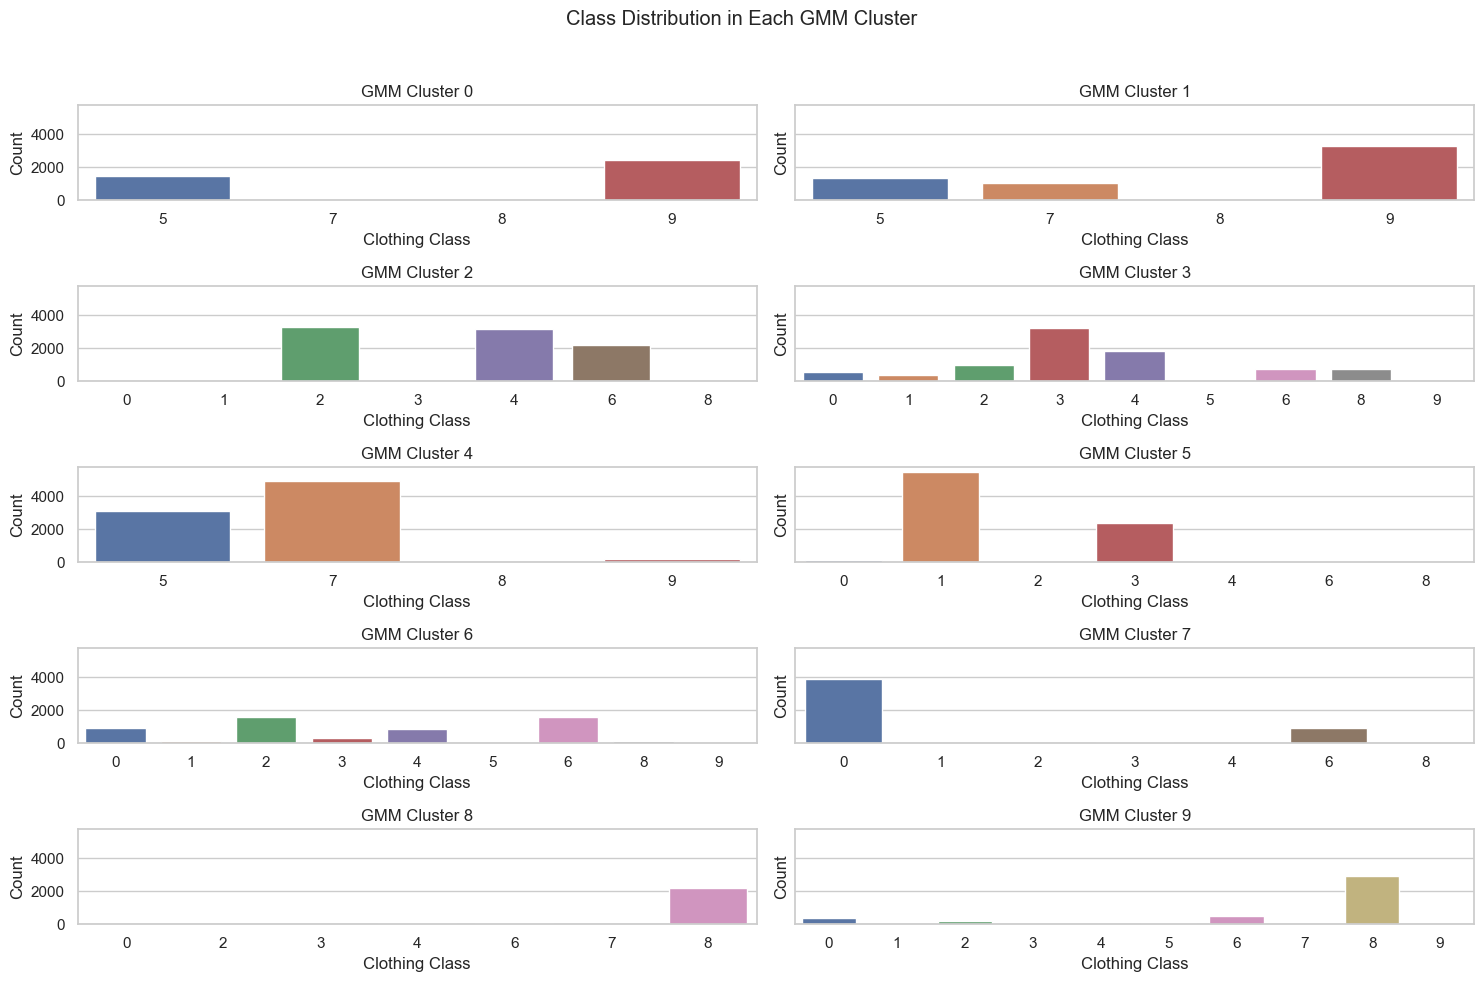

In [45]:
fig, axs = plt.subplots(5, 2, sharey=True, figsize=(15, 10))
fig.suptitle('Class Distribution in Each GMM Cluster')

for label, ax in zip(grouped_by_gmm.groups.keys(), axs.flatten()):
    cluster_data = grouped_by_gmm.get_group(label)['label'].value_counts().sort_index()

    # Plot the bar chart
    sns.barplot(x=cluster_data.index, y=cluster_data.values, ax=ax)
    ax.set_title(f'GMM Cluster {label}')
    ax.set_xlabel('Clothing Class')
    ax.set_ylabel('Count')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to avoid title overlap
plt.show()

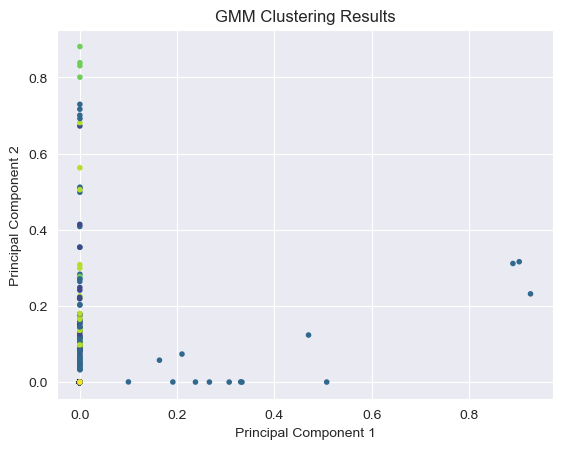

In [11]:
# Visualize the results
X_array = X.values

plt.scatter(X_array[:, 0], X_array[:, 1], c=cluster_labels_gmm, cmap='viridis', marker='.')
plt.title('GMM Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [13]:
from sklearn.metrics import silhouette_score

# Evaluate clustering performance using silhouette score
silhouette_avg = silhouette_score(X, cluster_labels_gmm)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.10206057476435663


## Density Peak Clustering

This algorithm identifies clusters as regions of high density separated by areas of lower density. It doesn't make assumptions about the shape of clusters.

## Affinity Propagation

Affinity Propagation is a clustering algorithm that works by passing messages between data points to determine which points should be exemplars. It doesn't assume specific shapes for clusters.

In [ ]:
from sklearn.cluster import AffinityPropagation

affinity_propagation = AffinityPropagation(random_state=42)
affinity_labels = affinity_propagation.fit_predict(reduced_X)
affinity_labels

In [ ]:
df_affinity = pd.DataFrame({'Affinity_Labels': affinity_labels})

data_pca_affinity = pd.concat([data_pca, df_affinity], axis=1)

grouped_by_affinity = data_pca_affinity.groupby('Affinity_Labels')

print("Number of different Affinity Propagation labels:", len(grouped_by_affinity))

for label, group in grouped_by_affinity:
    print(f"Counts for Affinity Propagation label {label}: {len(group)}")

In [ ]:
fig, axs = plt.subplots(5, 2, sharey=True, figsize=(15, 10))
fig.suptitle('Class Distribution in Each Affinity Propagation Cluster')

for label, ax in zip(grouped_by_affinity.groups.keys(), axs.flatten()):
    cluster_data = grouped_by_affinity.get_group(label)['label'].value_counts().sort_index()

    sns.barplot(x=cluster_data.index, y=cluster_data.values, ax=ax)
    ax.set_title(f'Affinity Propagation Cluster {label}')
    ax.set_xlabel('Clothing Class')
    ax.set_ylabel('Count')

plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()

## BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies):

BIRCH is a hierarchical clustering algorithm that can handle non-spherical clusters. It uses a tree-based data structure to efficiently represent the data distribution.

In [10]:
from sklearn.cluster import Birch

birch = Birch(n_clusters=10)
birch_labels = birch.fit_predict(reduced_X)

In [11]:
df_birch = pd.DataFrame({'BIRCH_Labels': birch_labels})
data_pca_birch = pd.concat([data_pca, df_birch], axis=1)
grouped_by_birch = data_pca_birch.groupby('BIRCH_Labels')

print("Number of different BIRCH labels:", len(grouped_by_birch))

for label, group in grouped_by_birch:
    print(f"Counts for BIRCH label {label}: {len(group)}")


Number of different BIRCH labels: 10
Counts for BIRCH label 0: 3116
Counts for BIRCH label 1: 4161
Counts for BIRCH label 2: 11258
Counts for BIRCH label 3: 13531
Counts for BIRCH label 4: 3091
Counts for BIRCH label 5: 5502
Counts for BIRCH label 6: 3897
Counts for BIRCH label 7: 3186
Counts for BIRCH label 8: 8190
Counts for BIRCH label 9: 4068


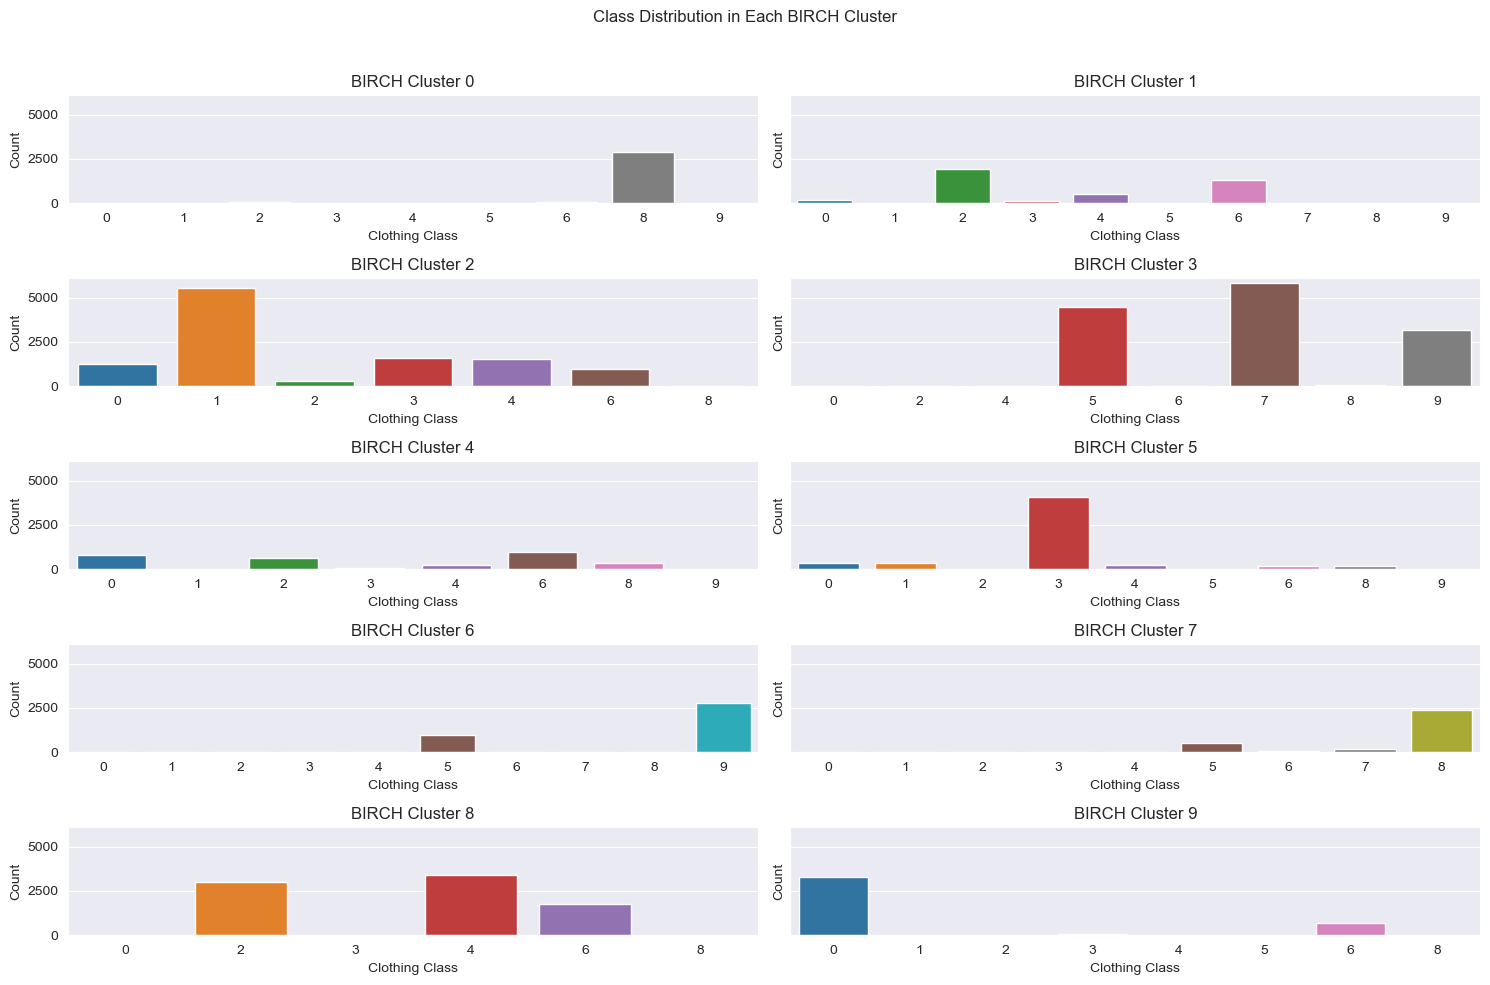

In [13]:
import seaborn as sns
fig, axs = plt.subplots(5, 2, sharey=True, figsize=(15, 10))
fig.suptitle('Class Distribution in Each BIRCH Cluster')

for label, ax in zip(grouped_by_birch.groups.keys(), axs.flatten()):
    cluster_data = grouped_by_birch.get_group(label)['label'].value_counts().sort_index()

    sns.barplot(x=cluster_data.index, y=cluster_data.values, ax=ax)
    ax.set_title(f'BIRCH Cluster {label}')
    ax.set_xlabel('Clothing Class')
    ax.set_ylabel('Count')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to avoid title overlap
plt.show()

In [14]:
from sklearn.metrics import adjusted_rand_score

In [15]:
adjusted_rand_score_value_birch = adjusted_rand_score(Y, birch_labels)
print(f"Adjusted Rand Score: {adjusted_rand_score_value_birch}")

Adjusted Rand Score: 0.36627898918828994


In [ ]:
silhouette_affinity = silhouette_score(X, affinity_labels)
silhouette_birch = silhouette_score(X, birch_labels)

print(f"Silhouette Score - Affinity Propagation: {silhouette_affinity}")
print(f"Silhouette Score - BIRCH: {silhouette_birch}")